In [ ]:
!pip install streamlit
!pip install pyngrok

In [2]:
!pkill -f ngrok

In [3]:
!ngrok config add-authtoken 2okHSA2Qfrk0HxHbFmcuwXuwzfd_2jqkuYkzLvRLniEoWtGqT

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml                                


In [4]:
import warnings
warnings.filterwarnings('ignore')

# Imorting Libraries

In [5]:
import pandas as pd
import numpy as nb 
import matplotlib.pyplot as plt 
import tensorflow as tf
from tensorflow.keras.layers import  Embedding, LSTM, GRU, Dropout, Dense, GlobalMaxPooling1D, Bidirectional
from tensorflow.keras.models import Sequential , load_model 
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import imdb
from tensorflow.keras.callbacks import EarlyStopping ,TensorBoard
from sklearn.metrics import precision_recall_curve
import streamlit as st
from pyngrok import ngrok
import os
import datetime

# Loadin IMDB

In [6]:
vocabulary_size = 10000
(x_train,y_train),(x_test,y_test) = imdb.load_data(num_words=vocabulary_size)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:
sample_review = x_train[0]
print(sample_review)

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [8]:
dictionary = imdb.get_word_index()
# print(dictionary)

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [9]:
reversed_dictionary =  {value:key for key,value in dictionary.items()}
print(list(reversed_dictionary.items())[:50])

[(34701, 'fawn'), (52006, 'tsukino'), (52007, 'nunnery'), (16816, 'sonja'), (63951, 'vani'), (1408, 'woods'), (16115, 'spiders'), (2345, 'hanging'), (2289, 'woody'), (52008, 'trawling'), (52009, "hold's"), (11307, 'comically'), (40830, 'localized'), (30568, 'disobeying'), (52010, "'royale"), (40831, "harpo's"), (52011, 'canet'), (19313, 'aileen'), (52012, 'acurately'), (52013, "diplomat's"), (25242, 'rickman'), (6746, 'arranged'), (52014, 'rumbustious'), (52015, 'familiarness'), (52016, "spider'"), (68804, 'hahahah'), (52017, "wood'"), (40833, 'transvestism'), (34702, "hangin'"), (2338, 'bringing'), (40834, 'seamier'), (34703, 'wooded'), (52018, 'bravora'), (16817, 'grueling'), (1636, 'wooden'), (16818, 'wednesday'), (52019, "'prix"), (34704, 'altagracia'), (52020, 'circuitry'), (11585, 'crotch'), (57766, 'busybody'), (52021, "tart'n'tangy"), (14129, 'burgade'), (52023, 'thrace'), (11038, "tom's"), (52025, 'snuggles'), (29114, 'francesco'), (52027, 'complainers'), (52125, 'templarios')

In [10]:
orginal_review = ' '.join([reversed_dictionary.get(i-3,'?') for i in sample_review])
orginal_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

Uniform rviews length by Padding

In [11]:
doc_len = 500
x_train = sequence.pad_sequences(x_train , maxlen=doc_len)
x_test = sequence.pad_sequences(x_test  ,maxlen=doc_len)
x_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

# THE MODEL

In [12]:
model = Sequential()
model.add(Embedding(vocabulary_size, 128, input_length=doc_len))

model.add(Bidirectional(LSTM(128, activation='tanh', return_sequences=True)))  
model.add(Dropout(0.4))  

model.add(GRU(128, activation='tanh', return_sequences=True))  
model.add(Dropout(0.4))  


model.add(GlobalMaxPooling1D())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

# Compile the model with Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


model.build(input_shape=(None, 500))
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 500, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 500, 256)       │       263,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 500, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 500, 128)       │       148,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 500, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ (None, 128)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,716,225 (6.55 MB)

 Trainable params: 1,716,225 (6.55 MB)

 Non-trainable params: 0 (0.00 B)

# Callbacks:

In [14]:
early_stopping = EarlyStopping(monitor='val_loss' , patience =3  ,restore_best_weights=True)

log_dir = 'logs/fit/' + datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
tensorboard = TensorBoard(log_dir = log_dir , histogram_freq=1)

history  =model.fit(x_train , y_train,
                    batch_size=32 , epochs=20,
                    validation_split=0.2,
                    callbacks=[early_stopping,tensorboard])

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 59ms/step - accuracy: 0.9731 - loss: 0.0783 - val_accuracy: 0.8832 - val_loss: 0.2879
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 36s 58ms/step - accuracy: 0.9838 - loss: 0.0473 - val_accuracy: 0.8860 - val_loss: 0.3111
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 59ms/step - accuracy: 0.9886 - loss: 0.0379 - val_accuracy: 0.8804 - val_loss: 0.3638
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 36s 58ms/step - accuracy: 0.9926 - loss: 0.0264 - val_accuracy: 0.8796 - val_loss: 0.3575


In [15]:
def process_text(text):
    words = text.lower().split()
    encoded_review = [dictionary.get(word,2)+3 for word in words]
    padded_review  = sequence.pad_sequences([encoded_review] ,maxlen=doc_len)
    return padded_review
    
def predict_sentiment(review):
    preprocessed_input = process_text(review)
    prediction = model.predict(preprocessed_input)
    sentiment  = 'Positive' if prediction[0][0] >0.5 else 'Negative'
    return sentiment , prediction[0][0]

In [16]:
sample_reviews = ["great movie", "terrible experience", "excellent!", "not bad", "could be better"]

for review in sample_reviews:
    sentiment, prediction_score = predict_sentiment(review)
    print(f"Review: '{review}'")
    print(f"Sentiment: {sentiment}")
    print(f"Prediction Score: {prediction_score}\n")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step
Review: 'great movie'
Sentiment: Positive
Prediction Score: 0.7401596307754517

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Review: 'terrible experience'
Sentiment: Negative
Prediction Score: 0.1277105212211609

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Review: 'excellent!'
Sentiment: Negative
Prediction Score: 0.4567112922668457

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Review: 'not bad'
Sentiment: Negative
Prediction Score: 0.3881509006023407

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Review: 'could be better'
Sentiment: Negative
Prediction Score: 0.382673978805542



In [17]:
example_review = "Very emotional"
sentiment , accuracy = predict_sentiment(example_review)
print(f'review: {example_review}')
print(f'Sentiment: {sentiment}')
print(f'Prediction Score:{accuracy*100:.2f} %')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
review: Very emotional
Sentiment: Positive
Prediction Score:77.65 %


In [18]:
model.save('moveies_reviews.h5')

782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step


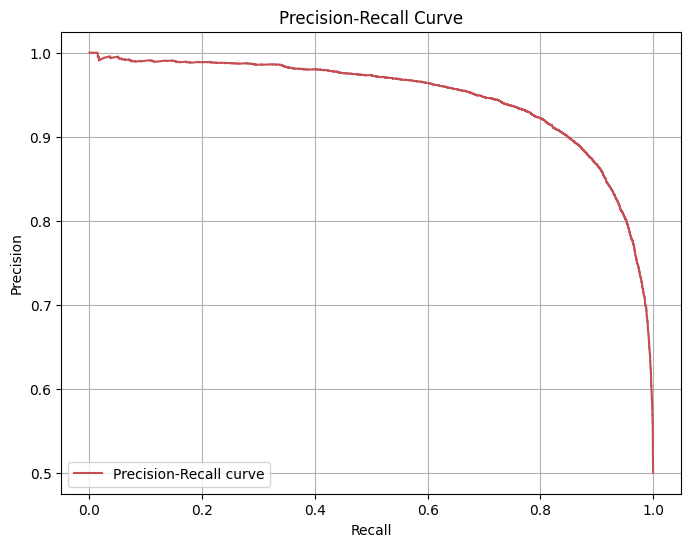

In [19]:
y_pred = model.predict(x_test)
precision, recall, _ = precision_recall_curve(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='#C44E52', label='Precision-Recall curve')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

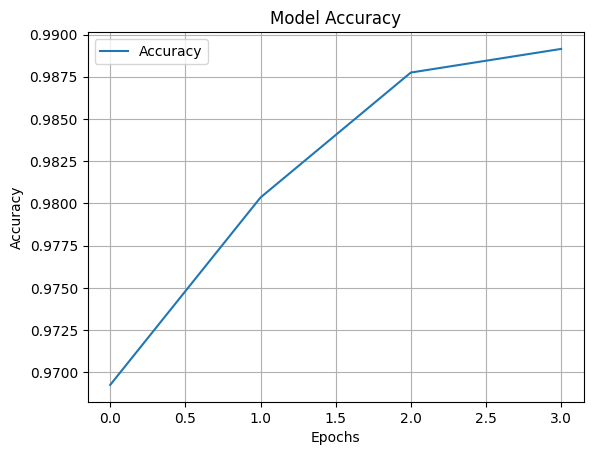

In [22]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
puplic_url = ngrok.connect(8501)
print(puplic_url)

with open ('app.py' , 'w') as f:
    f.write(
    
import streamlit as st
from tensorflow.keras.models import load_model
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

model = load_model('moveies_reviews.h5')
doc_len =500
dictionary = imdb.get_word_index()
        
def predict_review(text):
        words = text.lower().split()
        encrypted_review = [dictionary.get(word,2)+3 for word in words]
        padded_review = pad_sequences([encrypted_review] ,maxlen=doc_len)
        prediction = model.predict(padded_review)
        sentiment = 'Positive' if prediction[0][0] > 0.5 else "Negative"
        return sentiment , f'{prediction[0][0]*100:.2f} %'


    
st.title('Movies Reviews Sentiment Prediction')
st.write('Enter a movie review to classify it as positive or negative:')

input_review =  st.text_area('Movie Review')
if st.button('Classify'):
        sentiment , Prediction_score = predict_review(input_review)
        st.write(f'Sentiment: {sentiment}')
        st.write(f'Prediction Score: {Prediction_score}')
        
        
else:
        st.write('Please enter a movie review.')
    
''' )
os.system('streamlit run app.py --server.port 8501')

NgrokTunnel: "https://22bb-34-45-197-88.ngrok-free.app" -> "http://localhost:8501"



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.19.2.2:8501
  External URL: http://34.45.197.88:8501

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


2024-11-17 17:13:00.124 Uncaught app exception
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/keras/src/layers/layer.py", line 223, in build_wrapper
    original_build_method(*args, **kwargs)
  File "/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py", line 278, in build
    self.cell.build(step_input_shape)
  File "/opt/conda/lib/python3.10/site-packages/keras/src/layers/layer.py", line 222, in build_wrapper
    with obj._open_name_scope():
  File "/opt/conda/lib/python3.10/site-packages/keras/src/backend/tensorflow/core.py", line 295, in __exit__
    super().__exit__(*args, **kwargs)
  File "/opt/conda/lib/python3.10/site-packages/keras/src/backend/common/name_scope.py", line 61, in __exit__
    name_scope_stack.pop()
IndexError: pop from empty list

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/streamlit/runtime/scriptrunner/e

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


2024-11-17 17:19:25.851 Uncaught app exception
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/keras/src/layers/layer.py", line 223, in build_wrapper
    original_build_method(*args, **kwargs)
  File "/opt/conda/lib/python3.10/site-packages/keras/src/models/sequential.py", line 183, in build
    x = layer(x)
  File "/opt/conda/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/opt/conda/lib/python3.10/site-packages/keras/src/backend/common/name_scope.py", line 61, in __exit__
    name_scope_stack.pop()
AttributeError: 'NoneType' object has no attribute 'pop'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/streamlit/runtime/scriptrunner/exec_code.py", line 88, in exec_func_with_error_handling
    result = func()
  File "/opt/conda/lib/python3.10/site

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


2024-11-17 17:24:08.482 Uncaught app exception
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/keras/src/layers/layer.py", line 223, in build_wrapper
    original_build_method(*args, **kwargs)
  File "/opt/conda/lib/python3.10/site-packages/keras/src/models/sequential.py", line 183, in build
    x = layer(x)
  File "/opt/conda/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/opt/conda/lib/python3.10/site-packages/keras/src/backend/common/name_scope.py", line 61, in __exit__
    name_scope_stack.pop()
IndexError: pop from empty list

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/streamlit/runtime/scriptrunner/exec_code.py", line 88, in exec_func_with_error_handling
    result = func()
  File "/opt/conda/lib/python3.10/site-packages/streamlit/runti

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


2024-11-17 17:27:13.950 Uncaught app exception
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/keras/src/layers/layer.py", line 223, in build_wrapper
    original_build_method(*args, **kwargs)
  File "/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py", line 278, in build
    self.cell.build(step_input_shape)
  File "/opt/conda/lib/python3.10/site-packages/keras/src/layers/layer.py", line 222, in build_wrapper
    with obj._open_name_scope():
  File "/opt/conda/lib/python3.10/site-packages/keras/src/backend/tensorflow/core.py", line 295, in __exit__
    super().__exit__(*args, **kwargs)
  File "/opt/conda/lib/python3.10/site-packages/keras/src/backend/common/name_scope.py", line 61, in __exit__
    name_scope_stack.pop()
IndexError: pop from empty list

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/streamlit/runtime/scriptrunner/e

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


2024-11-17 17:29:57.358 Uncaught app exception
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/keras/src/layers/layer.py", line 223, in build_wrapper
    original_build_method(*args, **kwargs)
  File "/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py", line 278, in build
    self.cell.build(step_input_shape)
  File "/opt/conda/lib/python3.10/site-packages/keras/src/layers/layer.py", line 222, in build_wrapper
    with obj._open_name_scope():
  File "/opt/conda/lib/python3.10/site-packages/keras/src/backend/tensorflow/core.py", line 295, in __exit__
    super().__exit__(*args, **kwargs)
  File "/opt/conda/lib/python3.10/site-packages/keras/src/backend/common/name_scope.py", line 61, in __exit__
    name_scope_stack.pop()
IndexError: pop from empty list

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/streamlit/runtime/scriptrunner/e

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


2024-11-17 17:34:36.523 Uncaught app exception
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/keras/src/layers/layer.py", line 223, in build_wrapper
    original_build_method(*args, **kwargs)
  File "/opt/conda/lib/python3.10/site-packages/keras/src/models/sequential.py", line 183, in build
    x = layer(x)
  File "/opt/conda/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 122, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "/opt/conda/lib/python3.10/site-packages/keras/src/backend/common/name_scope.py", line 61, in __exit__
    name_scope_stack.pop()
AttributeError: 'NoneType' object has no attribute 'pop'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/streamlit/runtime/scriptrunner/exec_code.py", line 88, in exec_func_with_error_handling
    result = func()
  File "/opt/conda/lib/python3.10/site

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


2024-11-17 17:35:56.568 Uncaught app exception
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/streamlit/runtime/scriptrunner/exec_code.py", line 88, in exec_func_with_error_handling
    result = func()
  File "/opt/conda/lib/python3.10/site-packages/streamlit/runtime/scriptrunner/script_runner.py", line 579, in code_to_exec
    exec(code, module.__dict__)
  File "/kaggle/working/app.py", line 8, in <module>
    model = load_model('moveies_reviews.h5')
  File "/opt/conda/lib/python3.10/site-packages/keras/src/saving/saving_api.py", line 183, in load_model
    return legacy_h5_format.load_model_from_hdf5(
  File "/opt/conda/lib/python3.10/site-packages/keras/src/legacy/saving/legacy_h5_format.py", line 155, in load_model_from_hdf5
    **saving_utils.compile_args_from_training_config(
  File "/opt/conda/lib/python3.10/site-packages/keras/src/legacy/saving/saving_utils.py", line 133, in compile_args_from_training_config
    optimizer = optimizers.deseria

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
  Stopping...


2